# Heart diseases detection

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, log_loss

#  Reading the dataset

In [2]:
df_cardio = pd.read_csv('heart_disease.csv')
df_cardio.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df_cardio.shape

(4238, 16)

In [4]:
df_cardio.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Data Cleaning

In [5]:
df_cardio.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df_cardio = df_cardio.drop(['education','BMI','heartRate'],axis=1)
df_cardio.head(6)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,99.0,0


In [7]:
df_cardio = df_cardio.dropna()
df_cardio.shape

(3764, 13)

In [8]:
df_cardio.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
glucose            0
TenYearCHD         0
dtype: int64

#  Analysing the data

In [9]:
df_car = df_cardio.copy()

In [10]:
gender = pd.DataFrame()
gender['Count'] = df_car.groupby('male')['male'].count()
gender

,Count
male,
0,2089
1,1675


Text(0, 0.5, 'count')

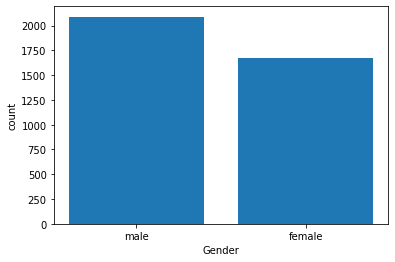

In [11]:
x = gender.index
y = gender['Count']
lables = ['male','female']
plt.bar(x,y)
plt.xlabel('Gender')
plt.xticks(x,labels=lables)
plt.ylabel('count')

In [12]:
pd.unique(df_cardio['age'])

array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 35, 60, 36,
       59, 54, 37, 56, 53, 49, 65, 51, 62, 40, 67, 57, 66, 64, 55, 58, 34,
       68, 33, 70, 32, 69], dtype=int64)

In [13]:
age = pd.DataFrame()
age['Ages'] = df_car.groupby('age')['age'].count()
age

,Ages
age,
32,1
33,5
34,15
35,35
36,78
37,83
38,130
39,148
40,171


([<matplotlib.axis.XTick at 0x1a45e127948>,
 <a list of 39 Text xticklabel objects>)

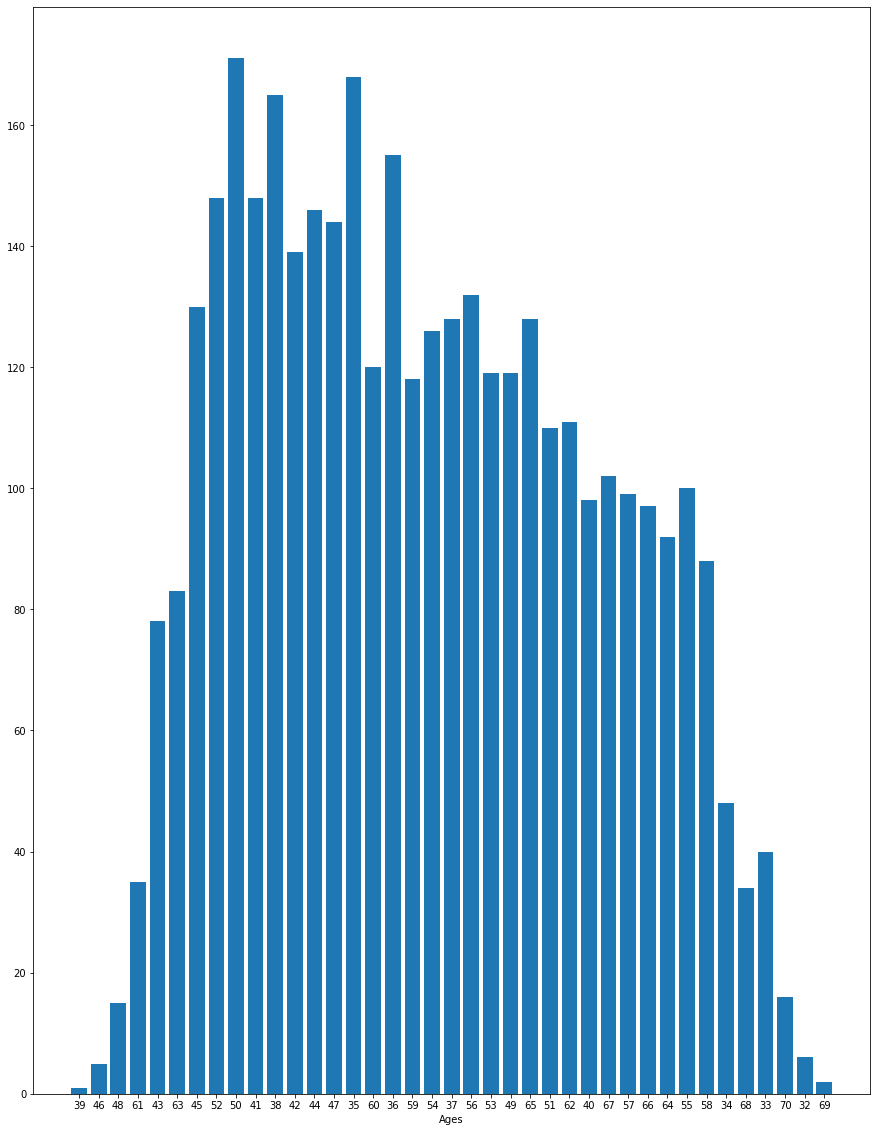

In [14]:
x = age['Ages']
y = age.index
label = [39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 35, 60, 36,
       59, 54, 37, 56, 53, 49, 65, 51, 62, 40, 67, 57, 66, 64, 55, 58, 34,
       68, 33, 70, 32, 69]

f, ax = plt.subplots(figsize = (15,20))
plt.bar(y,x)
plt.xlabel('Ages')
plt.xticks(y, labels = label)

In [15]:
# To check whether the systolic value is less than 100

df_cardio[df_cardio['sysBP']<=100]

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose,TenYearCHD
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,78.0,0
45,0,49,0,0.0,0.0,0,0,0,208.0,96.0,63.0,98.0,0
97,0,40,0,0.0,0.0,0,0,0,205.0,100.0,60.0,72.0,1
104,0,42,1,20.0,0.0,0,0,0,173.0,100.0,63.0,99.0,0
117,0,37,1,5.0,0.0,0,0,0,185.0,100.0,68.0,72.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4012,0,40,1,9.0,0.0,0,0,0,262.0,97.0,71.0,80.0,0
4050,1,50,1,20.0,0.0,0,0,0,262.0,97.5,62.5,84.0,0
4092,0,40,1,20.0,0.0,0,0,0,221.0,93.0,62.5,73.0,0
4133,0,39,0,0.0,0.0,0,0,0,195.0,97.5,60.0,68.0,0


In [16]:
# To check diastolic value less than 50

df_cardio[df_cardio['diaBP']<=50]

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose,TenYearCHD
3645,1,68,1,15.0,0.0,0,0,0,157.0,106.0,48.0,65.0,1


In [17]:
pd.unique(df_cardio['cigsPerDay'])

array([ 0., 20., 30., 23., 15., 10.,  5., 35., 43.,  1., 40.,  3.,  9.,
        2., 12.,  4., 18., 60., 25., 45.,  8., 13., 11.,  7.,  6., 38.,
       50., 29., 17., 16., 19., 70., 14.])

# Building a model

In [18]:
x = df_cardio.drop(['TenYearCHD'], axis=1)
x.head(5)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,85.0


In [19]:
y = df_cardio['TenYearCHD']
y.head(5)

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

# Decision Tree

In [21]:
regressor = DecisionTreeClassifier(criterion='entropy',random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [22]:
print(confusion_matrix(y_test,y_pred.round()))
print(classification_report(y_test,y_pred.round()))
print(accuracy_score(y_test, y_pred.round()))

[[545  82]
 [ 93  33]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       627
           1       0.29      0.26      0.27       126

    accuracy                           0.77       753
   macro avg       0.57      0.57      0.57       753
weighted avg       0.76      0.77      0.76       753

0.7675962815405046


In [23]:
print("R2_score:", r2_score(y_test, y_pred.round()))
print("Mean_squared_error:",mean_squared_error(y_test, y_pred.round()))
print("Mean_absolute_error",mean_absolute_error(y_test, y_pred.round()))

R2_score: -0.6679957469431153
Mean_squared_error: 0.23240371845949534
Mean_absolute_error 0.23240371845949534


In [24]:
print("Log Loss:",log_loss(y_test, y_pred.round()))

Log Loss: 8.027027139573235


# Naive Bayes 

In [25]:
regressor = GaussianNB()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [26]:
print(confusion_matrix(y_test,y_pred.round()))
print(classification_report(y_test,y_pred.round()))
print(accuracy_score(y_test, y_pred.round()))

[[586  41]
 [ 95  31]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       627
           1       0.43      0.25      0.31       126

    accuracy                           0.82       753
   macro avg       0.65      0.59      0.60       753
weighted avg       0.79      0.82      0.80       753

0.8193891102257637


In [27]:
print("R2_score:", r2_score(y_test, y_pred.round()))
print("Mean_squared_error:",mean_squared_error(y_test, y_pred.round()))
print("Mean_absolute_error",mean_absolute_error(y_test, y_pred.round()))

R2_score: -0.2962709804815067
Mean_squared_error: 0.1806108897742364
Mean_absolute_error 0.1806108897742364


In [28]:
print("Log Loss:",log_loss(y_test, y_pred.round()))

Log Loss: 6.238122673575686
